In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [28]:
df.shape

(10002, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [30]:
df.duplicated().sum()

2

In [31]:
df['Exited'].value_counts()  #imbalanced here

Exited
0    7964
1    2038
Name: count, dtype: int64

In [32]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [33]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64

In [34]:
df['Gender'].value_counts()

Gender
Male      5458
Female    4544
Name: count, dtype: int64

In [35]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)
df

 # With drop_first=True, the encoded columns will be:
# Geography_Germany: 1 if the geography is Germany, 0 otherwise.
# Geography_Spain: 1 if the geography is Spain, 0 otherwise.
# France is represented implicitly when both Geography_Germany and Geography_Spain are 0.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,False,False,False
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0,False,False,False


In [36]:
df.isnull().sum()

CreditScore          0
Age                  1
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [37]:
df.dropna(axis=0, how='any', inplace=True)


In [38]:
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=10)


In [39]:
from sklearn.preprocessing import StandardScaler
ms = StandardScaler()
X_train_scaled = ms.fit_transform(X_train)
X_test_scaled = ms.transform(X_test)

In [40]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
# we have - 1 i/p layer,  1 hidden layer, 1 o/p layer
# i/p layer
model.add(Dense(11, activation='relu', input_dim = 11))   # 11 perceptrons here. input_dim specifies the number of features (dimensions) in the input data.
# hidden layer
model.add(Dense(11, activation='relu'))   # 11 perceptrons here

# o/p layer
model.add(Dense(1, activation='sigmoid')) # for binary classification pblm, sigmoid is used
model.summary()

c:\Users\aiswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# compile model

model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

In [42]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split=.2) # validation_split=0.2: Indicates that 20% of the training data will be used for validation.

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6484 - loss: 0.6322 - val_accuracy: 0.7906 - val_loss: 0.4912
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4637 - val_accuracy: 0.8031 - val_loss: 0.4493
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8090 - loss: 0.4308 - val_accuracy: 0.8150 - val_loss: 0.4246
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.4147 - val_accuracy: 0.8325 - val_loss: 0.4048
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8293 - loss: 0.3929 - val_accuracy: 0.8481 - val_loss: 0.3900
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0.3712 - val_accuracy: 0.8512 - val_loss: 0.3779
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3561 - val_accuracy: 0.8531 - val_loss: 0.3725
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3538 - val_accu

In [43]:
model.layers[0].get_weights()   # shows weigths n bias...here showing weights btw i/p & hidden layer.....

[array([[ 0.25645173, -0.16166808, -0.30861026, -0.16820517,  0.6060121 ,
         -0.06778105, -0.3189306 ,  0.19321458,  0.12526721, -0.08350295,
          0.15683486],
        [ 0.52652186, -0.05147142,  0.22811897, -0.9345429 , -0.24486874,
         -0.73746926,  0.16036558,  0.24654211, -1.0266515 ,  0.8961909 ,
          0.02614293],
        [ 0.36355117, -0.03269985,  0.12843812, -0.27448994, -0.7017203 ,
         -0.00706953,  0.74153626, -0.09115182,  0.00667179,  0.50677335,
         -0.13292633],
        [ 0.07756753, -0.20026839,  0.04662802, -0.15888272, -0.2912843 ,
          0.02588895,  0.404205  , -0.39969945,  0.11293737, -0.07615917,
          0.2515264 ],
        [ 0.00510817, -0.8450935 ,  0.592445  ,  0.05325588,  0.2734294 ,
          0.18204135,  0.2206087 , -0.9973798 ,  0.03096811,  0.2904539 ,
          1.0909252 ],
        [ 0.3493351 ,  0.4236728 , -0.4725559 ,  0.10658287,  0.16798267,
          0.0494749 , -0.23975556, -0.22133791, -0.15218039, -0.3977614

In [44]:
model.layers[1].get_weights()

[array([[-0.2026251 , -0.3421202 ,  0.60757536, -2.356569  , -0.05119415,
         -0.22949252,  0.33009523,  0.5115187 , -0.2857744 ,  0.3188301 ,
         -0.12814112],
        [-0.60856307,  0.2432258 , -0.09349107,  0.12713458, -0.37946457,
         -0.5936989 ,  0.524268  ,  0.12077225, -0.14055151,  0.5569237 ,
         -0.15791288],
        [-0.09198351,  0.56731844,  0.27927876,  0.32411662, -0.2229281 ,
          0.5448498 ,  0.11924604,  0.4497667 , -0.38294476,  0.18865673,
          0.46719638],
        [ 0.28403455,  0.19150086,  0.68967825,  0.35865515,  0.3636303 ,
         -0.03414344,  0.3039654 , -0.48299462, -0.07742196,  0.6135785 ,
         -0.17521967],
        [ 0.3485052 ,  0.03809733,  0.51127756,  0.6474073 ,  0.16595858,
         -0.27416426, -0.15621635, -0.03313676,  0.2430035 ,  0.4869015 ,
         -0.01705115],
        [ 0.58985734,  0.0313084 ,  0.41143146, -0.25820345,  0.49778277,
          0.04501005,  0.2783885 , -0.5452729 , -0.81177586,  0.3756325

In [45]:
y_log = model.predict(X_test_scaled)   # o/p is in range 0-1 bcoz of sigmoid fn. customer will churn if value > threshold. else vice versa...we have to decide the threshold. eg: .5..
# threshold can be decided based on roc curve etc
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.06962161],
       [0.29296324],
       [0.8523707 ],
       ...,
       [0.04652779],
       [0.3372746 ],
       [0.26356956]], dtype=float32)

In [46]:
y_pred = np.where(y_log>.5,1,0)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

In [48]:
history.history

{'accuracy': [0.7435536980628967,
  0.8020002841949463,
  0.8155961632728577,
  0.8295046091079712,
  0.8388810753822327,
  0.8471636176109314,
  0.8518518805503845,
  0.8537271618843079,
  0.8560712337493896,
  0.8582590818405151,
  0.8563838005065918,
  0.8579465746879578,
  0.8593530058860779,
  0.8601344227790833,
  0.862322211265564,
  0.8606032133102417,
  0.8610720634460449,
  0.8610720634460449,
  0.8612282872200012,
  0.8634161353111267,
  0.8620097041130066,
  0.8635724186897278,
  0.8645100593566895,
  0.8632599115371704,
  0.8634161353111267,
  0.8638849854469299,
  0.8637287020683289,
  0.8645100593566895,
  0.8637287020683289,
  0.8648226261138916,
  0.8643537759780884,
  0.8641975522041321,
  0.8632599115371704,
  0.8634161353111267,
  0.8662291169166565,
  0.8643537759780884,
  0.864041268825531,
  0.8654477000236511,
  0.8645100593566895,
  0.8651351928710938,
  0.8649789094924927,
  0.8654477000236511,
  0.8654477000236511,
  0.8657602667808533,
  0.8662291169166565,


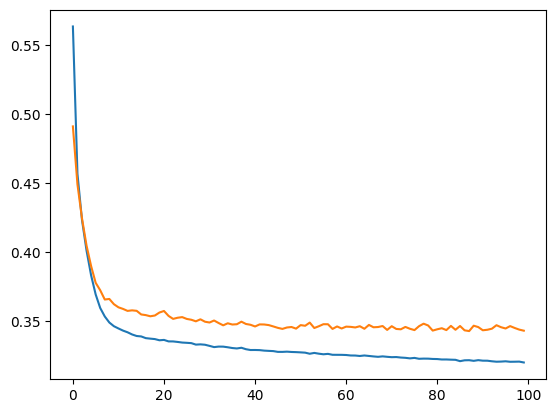

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

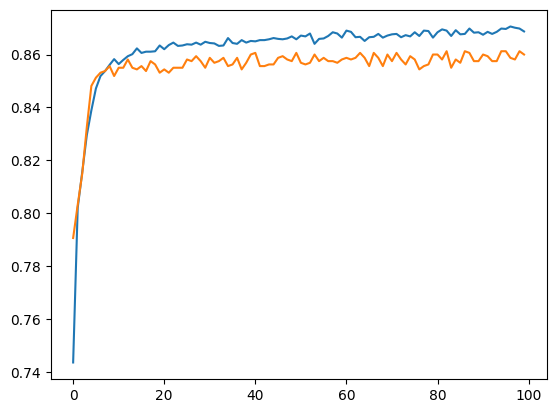

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [51]:
# o/p can be improved by
# 1. increasing epochs
# 2. change to reLu
# 3. increase no: of nodes
# 4. increase no: of layers